# Making Classification Data 

In [94]:
from sklearn.datasets import make_circles
# make 1000 samples 
n_samples = 1000

# create circles
X, y = make_circles(n_samples, noise=0.05, random_state=42) # noise: adds some random noise to the data
len(X), len(y)

(1000, 1000)

In [95]:
print("first 5 samples of X:")
print(X[:5])
print("first 5 samples of y:")
print(y[:5])


first 5 samples of X:
[[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
first 5 samples of y:
[1 1 1 1 0]


In [96]:
print(y) # it's a binary classification problem because y has only 2 classes 0 and 1

[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 

In [97]:
#  make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


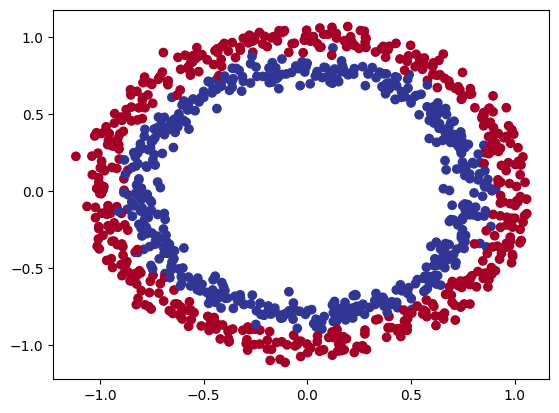

In [98]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu) # this is a colormap


### the data is working with is often referred to as a toy dataset because it's relatively simple
### it's small enough to understand but large enough to be non-trivial

In [99]:
# check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [100]:
# view the first exmaple of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"values for one sample: {X_sample}, label: {y_sample}")
print(f"shape of sample: {X_sample.shape} and label: {y_sample.shape}")


values for one sample: [0.74220688 0.24668576], label: 1
shape of sample: (2,) and label: ()


In [101]:
# create a train and test split
# turn data into tensors
import torch
from torch import nn
torch.__version__
print(torch.cuda.is_available())

True


In [102]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [103]:
X.dtype, y.dtype, type(X), type(y)


(torch.float32, torch.float32, torch.Tensor, torch.Tensor)

In [104]:
# split data into training and test sets
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42) # 80% training and 20% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [105]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # input features = 2 (X1, X2) and output features = 5 (hidden layer with 5 neurons)
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # output layer with 1 neuron (binary classification)

       
        # activation function will be used in the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # X-> layer_1 -> activation (not used here) -> layer_2 (output layer)


# instantiate the model and send it to device (GPU or CPU)

model_0 = CircleModelV0().to(device="cuda")
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [106]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [107]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.4151, -0.1183],
                      [ 0.1169,  0.0887],
                      [ 0.1066,  0.2392],
                      [ 0.2168, -0.5966],
                      [ 0.5385, -0.6388]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6133, 0.2389, 0.4401, 0.2224, 0.5201], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2436, -0.2478,  0.1014, -0.0918, -0.1173]], device='cuda:0')),
             ('layer_2.bias', tensor([0.1559], device='cuda:0'))])

In [108]:
# make predictions 

with torch.inference_mode():
    untrained_predictions = model_0(X_test.to(device="cuda"))
print(f"length of the predictions tensor: {len(untrained_predictions)}")
print(f"first 10 predictions:\n {untrained_predictions[:10]}")
# check the shape of the predictions tensor

print(f"shape of the predictions tensor: {untrained_predictions.shape}")
# check the shape of the predictions tensor



length of the predictions tensor: 200
first 10 predictions:
 tensor([[0.2789],
        [0.3057],
        [0.1781],
        [0.3106],
        [0.1279],
        [0.1461],
        [0.2647],
        [0.2290],
        [0.1737],
        [0.3081]], device='cuda:0')
shape of the predictions tensor: torch.Size([200, 1])


In [109]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [110]:
# setting up loss function and optimizer 
loss_fn = nn.BCEWithLogitsLoss() # binary cross entropy with logits loss function means we don't need to apply sigmoid activation function to the output layer

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [111]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.4151, -0.1183],
                      [ 0.1169,  0.0887],
                      [ 0.1066,  0.2392],
                      [ 0.2168, -0.5966],
                      [ 0.5385, -0.6388]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6133, 0.2389, 0.4401, 0.2224, 0.5201], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2436, -0.2478,  0.1014, -0.0918, -0.1173]], device='cuda:0')),
             ('layer_2.bias', tensor([0.1559], device='cuda:0'))])

In [112]:
#  calculate accuracy 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [113]:
#  training the model
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device="cuda"))[:5]
y_logits


tensor([[0.2789],
        [0.3057],
        [0.1781],
        [0.3106],
        [0.1279]], device='cuda:0')

In [114]:
# use the sigmoid activation function on our 
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5693],
        [0.5758],
        [0.5444],
        [0.5770],
        [0.5319]], device='cuda:0')

In [115]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [120]:
# find the predicted labels 
y_preds = torch.round(y_pred_probs)

# logits -> pred_probs -> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device="cuda"))))


# check for equality
print(torch.eq(y_preds.squeeze(),  y_pred_labels.squeeze()[:5])) # check if the predicted labels are equal to the true labels


# get rid of extra dimension
y_pred_labels.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [125]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epochs = 400

# data to the target device
X_train, y_train = X_train.to(device="cuda"), y_train.to(device="cuda")
X_test, y_test = X_test.to(device="cuda"), y_test.to(device="cuda")


# build training and evaluation loop 
for epoch in range(epochs):
    model_0.train()
    
    # forward pass
    y_logits = model_0(X_train).squeeze()
    
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> labels
    
    # calculate loss/accuracy 
    # we need to pass logits to BceWithLogits expects raw logits
    loss = loss_fn(y_logits, 
                   y_train)
    
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward() # backpropagation
    
    optimizer.step() # update weights and biases
    
    # testing 
    
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # calculate the test loss 
        test_loss = loss_fn(test_logits, y_test)
        
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
    if epoch % 10 == 0:
        print(f"epoch {epoch} | "
              f"train loss: {loss:.5f} | "
              f"train acc: {acc:.2f}% | "
              f"test loss: {test_loss:.5f} | "
              f"test acc: {test_acc:.2f}%")



epoch 0 | train loss: 0.69313 | train acc: 51.25% | test loss: 0.69501 | test acc: 47.50%
epoch 10 | train loss: 0.69310 | train acc: 51.38% | test loss: 0.69492 | test acc: 47.00%
epoch 20 | train loss: 0.69308 | train acc: 51.38% | test loss: 0.69484 | test acc: 47.00%
epoch 30 | train loss: 0.69307 | train acc: 51.12% | test loss: 0.69478 | test acc: 47.00%
epoch 40 | train loss: 0.69306 | train acc: 51.25% | test loss: 0.69472 | test acc: 47.00%
epoch 50 | train loss: 0.69304 | train acc: 51.12% | test loss: 0.69467 | test acc: 47.00%
epoch 60 | train loss: 0.69304 | train acc: 51.25% | test loss: 0.69463 | test acc: 48.50%
epoch 70 | train loss: 0.69303 | train acc: 51.62% | test loss: 0.69460 | test acc: 49.00%
epoch 80 | train loss: 0.69302 | train acc: 51.38% | test loss: 0.69457 | test acc: 49.00%
epoch 90 | train loss: 0.69302 | train acc: 51.00% | test loss: 0.69454 | test acc: 49.00%
epoch 100 | train loss: 0.69301 | train acc: 51.25% | test loss: 0.69452 | test acc: 47.50%

In [123]:
loss_fn

BCEWithLogitsLoss()

In [126]:
import requests
from pathlib import Path

# download helper functions if it's not already downloaded
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("downloading helper_functions.py...")
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py"
    )
    
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

downloading helper_functions.py...


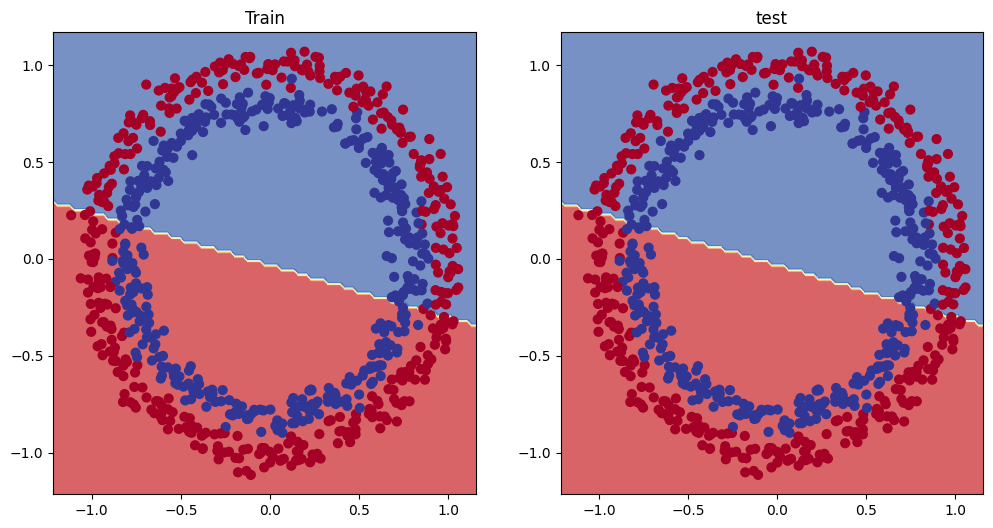

In [130]:
# plot decision boundary of a model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, X_train, y_train)